In [1]:
import numpy as np
import pandas as pd
import nltk


In [2]:
!wget https://www.dropbox.com/s/flh4ibn37w00hic/Twitter_Data.csv

--2022-08-24 16:31:59--  https://www.dropbox.com/s/flh4ibn37w00hic/Twitter_Data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/flh4ibn37w00hic/Twitter_Data.csv [following]
--2022-08-24 16:31:59--  https://www.dropbox.com/s/raw/flh4ibn37w00hic/Twitter_Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaea8b720273d1efebbea8c2850.dl.dropboxusercontent.com/cd/0/inline/BrpIOT_B3dmEt7mYzIhZ50ur1Mh74kBL7XiARYMmkfBrz2SaQnE1MIEgi5DijrRjmLHRTr5LwEoYtCDZybcN493dzrSNZWRLFBpa2-2u6_n7t7CqFiDM23lKXRCBMgJPDsSeRqG2vNPBZUwr7LHvwsOFFL7imMcsIbF2oDlRYQ5-OA/file# [following]
--2022-08-24 16:32:00--  https://ucaea8b720273d1efebbea8c2850.dl.dropboxusercontent.com/cd/0/inline/BrpIOT_B3dmEt7mYzIhZ50ur1Mh74kBL7XiARYMmkfBrz2SaQnE1M

In [3]:
df=pd.read_csv("Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df['category'].replace([-1.0,0.0,1.0],['Negative','Neutral','Positive'],inplace=True)

In [5]:
df.head(20)

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
5,kiya tho refresh maarkefir comment karo,Neutral
6,surat women perform yagna seeks divine grace f...,Neutral
7,this comes from cabinet which has scholars lik...,Neutral
8,with upcoming election india saga going import...,Positive
9,gandhi was gay does modi,Positive


In [6]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [9]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


In [10]:
import re

In [11]:
df['clean_text'] = df['clean_text'].str.lower()

In [12]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


In [13]:
df['clean_text'] = df['clean_text'].replace(r'[][()?<>$^.*?^]', '', regex=True)

In [14]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [15]:
import string

In [16]:
for i in string.punctuation : 
  df["clean_text"] = df.clean_text.replace(i,'')

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
df=df.reset_index(drop=True)

In [19]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162964,why these 456 crores paid neerav modi not reco...,Negative
162965,dear rss terrorist payal gawar what about modi...,Negative
162966,did you cover her interaction forum where she ...,Neutral
162967,there big project came into india modi dream p...,Neutral


In [20]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()] 

In [21]:
df['clean_text'] = df.apply(lambda x: tokenize(x['clean_text']), axis=1)


In [22]:
df

,clean_text,category
0,"[when, modi, promised, minimum, government, ma...",Negative
1,"[talk, all, the, nonsense, and, continue, all,...",Neutral
2,"[what, did, just, say, vote, for, modi, welcom...",Positive
3,"[asking, his, supporters, prefix, chowkidar, t...",Positive
4,"[answer, who, among, these, the, most, powerfu...",Positive
...,...,...
162964,"[why, these, crores, paid, neerav, modi, not, ...",Negative
162965,"[dear, rss, terrorist, payal, gawar, what, abo...",Negative
162966,"[did, you, cover, her, interaction, forum, whe...",Neutral
162967,"[there, big, project, came, into, india, modi,...",Neutral


In [23]:
from nltk.corpus import stopwords
df['clean_text']=df['clean_text'].apply(lambda x: [item for item in x if item not in stop_words])

In [24]:
df.head()

,clean_text,category
0,"[modi, promised, minimum, government, maximum,...",Negative
1,"[talk, nonsense, continue, drama, vote, modi]",Neutral
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",Positive
3,"[asking, supporters, prefix, chowkidar, names,...",Positive
4,"[answer, among, powerful, world, leader, today...",Positive


In [25]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
df['clean_text']=df['clean_text'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x ])

In [27]:
df

,clean_text,category
0,"[modi, promised, minimum, government, maximum,...",Negative
1,"[talk, nonsense, continue, drama, vote, modi]",Neutral
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",Positive
3,"[asking, supporter, prefix, chowkidar, name, m...",Positive
4,"[answer, among, powerful, world, leader, today...",Positive
...,...,...
162964,"[crore, paid, neerav, modi, recovered, congres...",Negative
162965,"[dear, r, terrorist, payal, gawar, modi, killi...",Negative
162966,"[cover, interaction, forum, left]",Neutral
162967,"[big, project, came, india, modi, dream, proje...",Neutral


In [28]:
df["count"]=0
for i in range(0,len(df)):
  df["count"][i]=len(df["clean_text"][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df

,clean_text,category,count
0,"[modi, promised, minimum, government, maximum,...",Negative,21
1,"[talk, nonsense, continue, drama, vote, modi]",Neutral,6
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",Positive,13
3,"[asking, supporter, prefix, chowkidar, name, m...",Positive,19
4,"[answer, among, powerful, world, leader, today...",Positive,10
...,...,...,...
162964,"[crore, paid, neerav, modi, recovered, congres...",Negative,12
162965,"[dear, r, terrorist, payal, gawar, modi, killi...",Negative,31
162966,"[cover, interaction, forum, left]",Neutral,4
162967,"[big, project, came, india, modi, dream, proje...",Neutral,9


In [30]:
X=df.drop(columns=["category","count"])
y=df.category

In [31]:
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,LSTM

In [32]:
lst=[]
for i in range(0,len(df["clean_text"])):
  new=""
  for j in range(0,len(df["clean_text"][i])):
    new=new+df["clean_text"][i][j]+" "
  lst.append(new) 

In [33]:
voc_size=10000
onehot_rep = [one_hot(words,voc_size) for words in lst]

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length = 25
embedded_docs = pad_sequences(onehot_rep, maxlen=sent_length, padding='pre')

In [35]:
vec_size=300
model=Sequential()
model.add(Embedding(voc_size,vec_size,input_length=sent_length))
model.add(LSTM(units=64))



model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))


model.add(Dense(1,activation="sigmoid"))

In [36]:

model.compile(optimizer="adam",loss="MeanSquaredError")

In [37]:
y=pd.get_dummies(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, y, test_size=0.2, random_state=42)

In [39]:
len(X_train),len(X_test),len(y_train),len(y_test)

(130375, 32594, 130375, 32594)

In [40]:
history = model.fit(X_train, y_train, epochs=5,batch_size=42)

Epoch 1/5
3105/3105 [==============================] - 31s 7ms/step - loss: 0.2223
Epoch 2/5
3105/3105 [==============================] - 19s 6ms/step - loss: 0.2222
Epoch 3/5
3105/3105 [==============================] - 19s 6ms/step - loss: 0.2222
Epoch 4/5
3105/3105 [==============================] - 20s 6ms/step - loss: 0.2222
Epoch 5/5
3105/3105 [==============================] - 19s 6ms/step - loss: 0.2222


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           3000000   
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,095,057
Trainable params: 3,095,057
Non-

In [42]:
model.evaluate(X_test, y_test)

1019/1019 [==============================] - 3s 3ms/step - loss: 0.2227


0.22270095348358154

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([[0.3551546 ],
       [0.3551402 ],
       [0.35523126],
       ...,
       [0.3552189 ],
       [0.35519278],
       [0.35511363]], dtype=float32)

In [47]:
y_test=y_test.drop(columns=["Negative","Neutral"])

In [48]:
y_test=list(y_test.Positive)

In [50]:
y_pred=y_pred.tolist()

In [49]:
for i in range(0,len(y_pred)):
  if y_pred[i]>y_pred.mean():
    y_pred[i]=1
  elif y_pred[i]==y_pred.mean():
    y_pred[i]=0
  else:
    y_pred[i]=0

In [51]:
for i in range(0,len(y_pred)):
  y_pred[i]=int(y_pred[i][0])

In [45]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_pred,y_test)

0.5124869607903295

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

[[11673  6546]
 [ 9344  5031]]


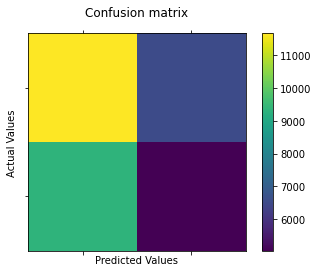

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [55]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60     21017
           1       0.35      0.43      0.39     11577

    accuracy                           0.51     32594
   macro avg       0.50      0.49      0.49     32594
weighted avg       0.54      0.51      0.52     32594

